In [5]:
import random
import matplotlib.pyplot as plt

# Classe pour représenter la structure d'un arbre binaire avec le suivi du nombre de bits aléatoires utilisés.
class ArbreBinaire:
    def __init__(self, gauche=None, droite=None):
        self.gauche = gauche
        self.droite = droite

    def est_feuille(self):
        return self.gauche is None and self.droite is None


In [6]:

# Fonction pour générer un arbre binaire de manière aléatoire et mesurer le nombre de bits utilisés.
def generer_arbre_aleatoire(profondeur_max, bits_utilises=[0]):
    if profondeur_max == 0 or random.random() > 0.5:
        bits_utilises[0] += 1  # On compte un bit pour chaque choix aléatoire
        return ArbreBinaire()

    gauche = generer_arbre_aleatoire(profondeur_max - 1, bits_utilises)
    droite = generer_arbre_aleatoire(profondeur_max - 1, bits_utilises)
    bits_utilises[0] += 2  # Compter les bits pour les choix des deux enfants

    return ArbreBinaire(gauche, droite)


In [7]:

# Fonction pour calculer la profondeur d'un arbre.
def calculer_profondeur(arbre):
    if arbre.est_feuille():
        return 0
    gauche_profondeur = calculer_profondeur(arbre.gauche) if arbre.gauche else 0
    droite_profondeur = calculer_profondeur(arbre.droite) if arbre.droite else 0
    return 1 + max(gauche_profondeur, droite_profondeur)


In [8]:

# Fonction pour calculer la largeur d'un arbre.
def calculer_largeur(arbre):
    if arbre is None:
        return 0

    # Utiliser une file pour le parcours niveau par niveau.
    queue = [arbre]
    max_largeur = 0

    while queue:
        niveau_actuel = len(queue)
        max_largeur = max(max_largeur, niveau_actuel)

        for _ in range(niveau_actuel):
            noeud = queue.pop(0)
            if noeud.gauche:
                queue.append(noeud.gauche)
            if noeud.droite:
                queue.append(noeud.droite)

    return max_largeur


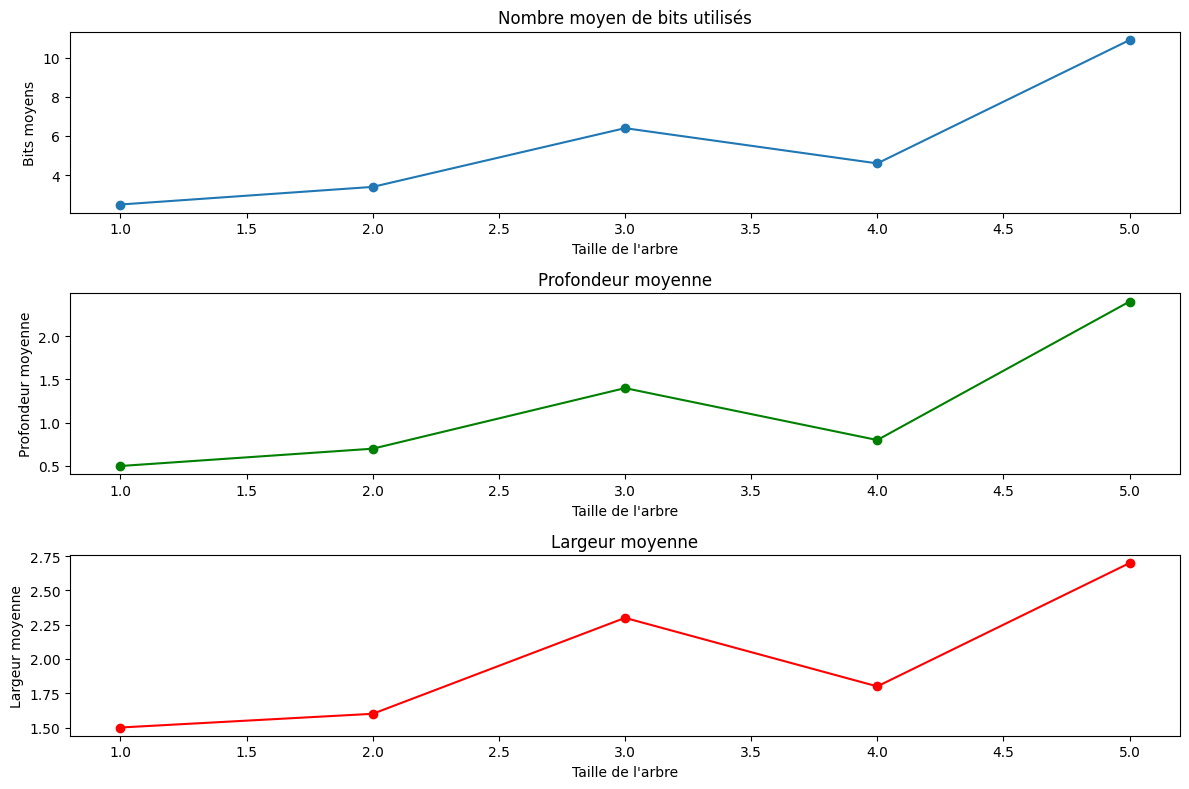

In [9]:

#! Plot de génération des arbres de différentes tailles et tracer les mesures.
def experimentations(taille_max, nombre_arbres):
    tailles = list(range(1, taille_max + 1))
    bits_moyens = []
    profondeurs_moyennes = []
    largeurs_moyennes = []

    for taille in tailles:
        total_bits = 0
        total_profondeur = 0
        total_largeur = 0

        for _ in range(nombre_arbres):
            bits_utilises = [0]
            arbre = generer_arbre_aleatoire(taille, bits_utilises)
            total_bits += bits_utilises[0]
            total_profondeur += calculer_profondeur(arbre)
            total_largeur += calculer_largeur(arbre)

        bits_moyens.append(total_bits / nombre_arbres)
        profondeurs_moyennes.append(total_profondeur / nombre_arbres)
        largeurs_moyennes.append(total_largeur / nombre_arbres)

    # Afficher les résultats sur des graphiques.
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(tailles, bits_moyens, marker='o', label='Bits Moyens')
    plt.title("Nombre moyen de bits utilisés")
    plt.xlabel("Taille de l'arbre")
    plt.ylabel("Bits moyens")

    plt.subplot(3, 1, 2)
    plt.plot(tailles, profondeurs_moyennes, marker='o', label='Profondeur Moyenne', color='g')
    plt.title("Profondeur moyenne")
    plt.xlabel("Taille de l'arbre")
    plt.ylabel("Profondeur moyenne")

    plt.subplot(3, 1, 3)
    plt.plot(tailles, largeurs_moyennes, marker='o', label='Largeur Moyenne', color='r')
    plt.title("Largeur moyenne")
    plt.xlabel("Taille de l'arbre")
    plt.ylabel("Largeur moyenne")

    plt.tight_layout()
    plt.show()


experimentations(5, 10)
